Introducción a las Series de Tiempo

## Configuración inicial

### Cargamos nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from datetime import datetime

### Cargamos y preparamos los datos

In [3]:
df = pd.read_csv('./Data/AirPassengers.csv')

In [4]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

## Trabajando con Series de Tiempo

#### Ajustamos el formato de los datos

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

#### Ajustamos el indice de nuestro dataset

In [6]:
df.set_index('Month', inplace=True)

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Convertimos nuestro dataframe en una serie de tiempo

In [8]:
ts = df['#Passengers']

In [9]:
# Consultando por el indice
ts['1949-01-01']

112

In [10]:
# Consultar utilizando la libreria datetime
ts[datetime(1949,1,1)]

112

In [11]:
# Consultar un rango de fechas
ts['1949-01-01':'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [12]:
# Traer un rango hasta una fecha concreta
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
# Traer todos los datos de un año
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

## Estacionariedad

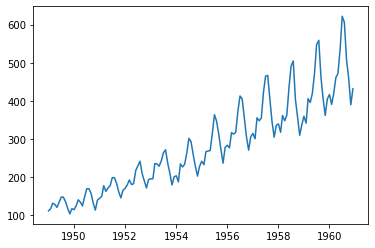

In [14]:
plt.plot(ts)

### Media y desviación estandar movil

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def rolling_MS(timeseries):
    rolmean = timeseries.rolling(12, center=True).mean()
    rolstd = timeseries.rolling(12, center=True).std()

    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label ='Media Movil')
    plt.plot(rolstd, color='green', label="Std Movil")
    plt.legend(loc='best')
    plt.title('Media Movil y Std Movil')

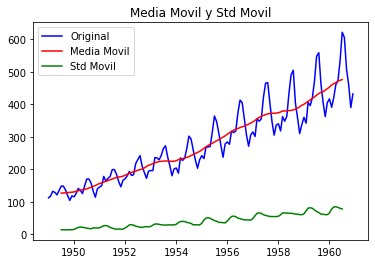

In [17]:
rolling_MS(ts)

### El test de Dickey-Fuller

In [18]:
wf = pd.DataFrame(columns=['c'])

def test_DF(timeseries):
    models = ['c', 'ct', 'ctt', 'nc']
    for i in range(len(models)):
        dftest = adfuller(timeseries, autolag='AIC', regression=models[i])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                                 'p-value',
                                                 '# Lags',
                                                 'Number of Observations'])
        for key, value in dftest[4].items():
            dfoutput['Critical value (%s)'%key] = value
        wf[models[i]] = dfoutput

In [19]:
test_DF(ts)

In [20]:
wf

,c,ct,ctt,nc
Test Statistic,0.815369,-2.100782,-3.233678,2.390602
p-value,0.991880,0.545659,0.195942,0.997180
# Lags,13.000000,13.000000,13.000000,13.000000
Number of Observations,130.000000,130.000000,130.000000,130.000000
Critical value (1%),-3.481682,-4.030152,-4.462542,-2.583153
Critical value (5%),-2.884042,-3.444818,-3.878611,-1.943251
Critical value (10%),-2.578770,-3.147182,-3.581753,-1.614926


<strong> Nuestra serie NO es estacionaria !!! </strong>

## Hacer la serie estacionaria

### Tendencia

#### Suavizamos nuestra serie

In [21]:
ts_log = np.log(ts)

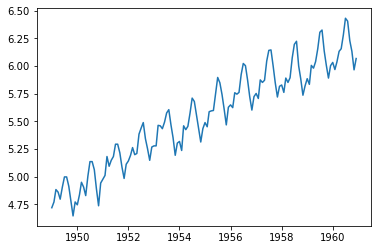

In [22]:
plt.plot(ts_log)

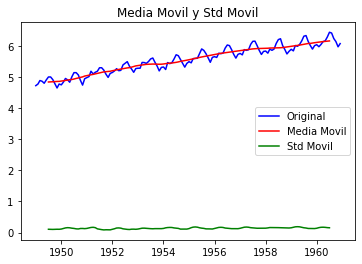

In [23]:
rolling_MS(ts_log)

In [24]:
moving_avg = ts_log.rolling(12, center=True).mean()

#### Quitamos la media de nuestros datos

In [25]:
ts_diff_mean = ts_log - moving_avg

In [26]:
ts_diff_mean.dropna(inplace=True)

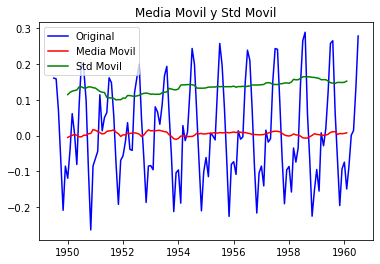

In [27]:
rolling_MS(ts_diff_mean)

In [28]:
test_DF(ts_diff_mean)

In [29]:
wf

,c,ct,ctt,nc
Test Statistic,-4.492454,-4.519067,-4.478075,-2.946760
p-value,0.000203,0.001405,0.007024,0.003158
# Lags,13.000000,13.000000,13.000000,13.000000
Number of Observations,119.000000,119.000000,119.000000,119.000000
Critical value (1%),-3.486535,-4.036934,-4.471237,-2.584784
Critical value (5%),-2.886151,-3.448049,-3.882970,-1.943476
Critical value (10%),-2.579896,-3.149068,-3.584424,-1.614765


<strong> Nuestra serie es estacionaria !!! </strong>

### Estacionalidad (con Tendencia)

#### Primera diferencia

In [30]:
ts_log_diff = ts_log - ts_log.shift()

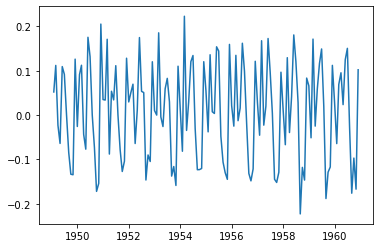

In [31]:
plt.plot(ts_log_diff)

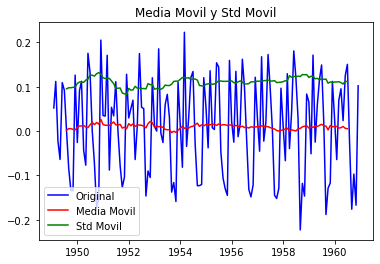

In [32]:
rolling_MS(ts_log_diff)

In [33]:
ts_log_diff.dropna(inplace=True)

In [34]:
test_DF(ts_diff_mean)

In [35]:
wf

,c,ct,ctt,nc
Test Statistic,-4.492454,-4.519067,-4.478075,-2.946760
p-value,0.000203,0.001405,0.007024,0.003158
# Lags,13.000000,13.000000,13.000000,13.000000
Number of Observations,119.000000,119.000000,119.000000,119.000000
Critical value (1%),-3.486535,-4.036934,-4.471237,-2.584784
Critical value (5%),-2.886151,-3.448049,-3.882970,-1.943476
Critical value (10%),-2.579896,-3.149068,-3.584424,-1.614765


<strong> Nuestra serie es estacionaria !!! </strong>

#### Descomposición

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
decomposition = seasonal_decompose(ts_log)

In [38]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

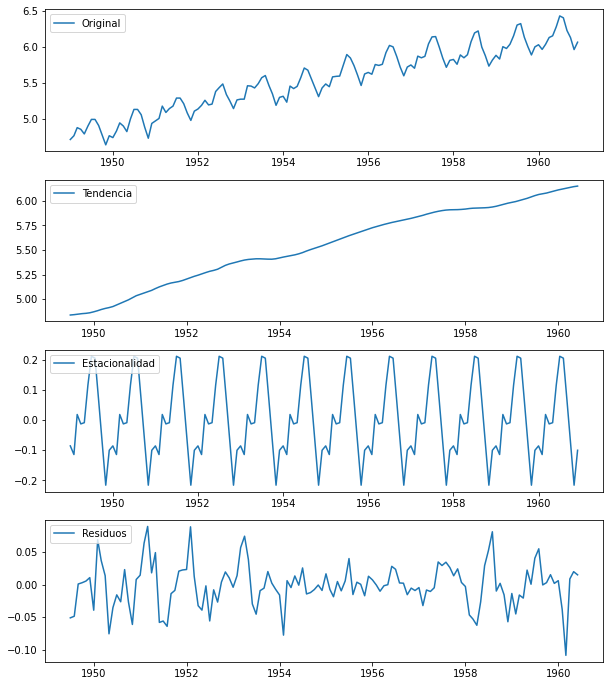

In [39]:
plt.figure(figsize=(10,12))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc=2)
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc=2)
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc=2)
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc=2)



In [40]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

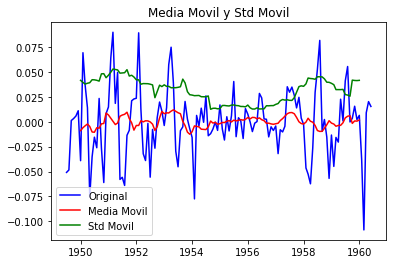

In [41]:
rolling_MS(ts_log_decompose)

In [42]:
test_DF(ts_log_decompose)

In [43]:
wf

,c,ct,ctt,nc
Test Statistic,-6.332387e+00,-6.315992e+00,-6.398489,-6.358925e+00
p-value,2.885059e-08,4.649523e-07,0.000002,1.583763e-09
# Lags,9.000000e+00,9.000000e+00,9.000000,9.000000e+00
Number of Observations,1.220000e+02,1.220000e+02,122.000000,1.220000e+02
Critical value (1%),-3.485122e+00,-4.034960e+00,-4.468706,-2.584310e+00
Critical value (5%),-2.885538e+00,-3.447109e+00,-3.881702,-1.943411e+00
Critical value (10%),-2.579569e+00,-3.148519e+00,-3.583647,-1.614811e+00


<strong> Nuestra serie es estacionaria !!! </strong>

## Pronostico de una Serie de Tiempo

In [44]:
from statsmodels.tsa.arima.model import ARIMA

### Identificar los grados de p y q

In [45]:
from statsmodels.tsa.stattools import acf, pacf

In [46]:
lag_acf = acf(ts_log_diff, nlags=20, fft=True)
lag_pacf = pacf(ts_log_diff, nlags=20, method='OLS')

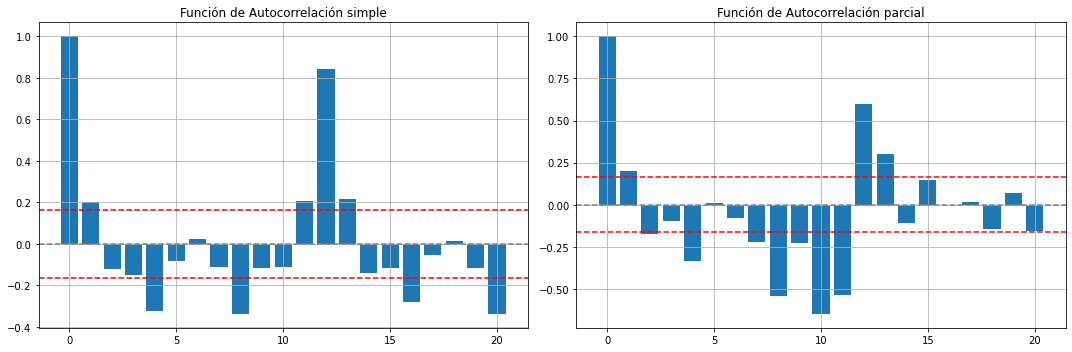

In [47]:
plt.figure(figsize=(15,5))

## ACF
plt.subplot(121)
plt.bar(range(len(lag_acf)),lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='red')
plt.title('Función de Autocorrelación simple')
plt.grid()

## PACF 
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='red')
plt.title('Función de Autocorrelación parcial')
plt.grid()

plt.tight_layout()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

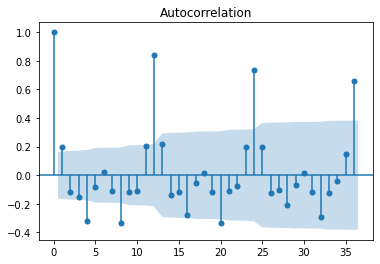

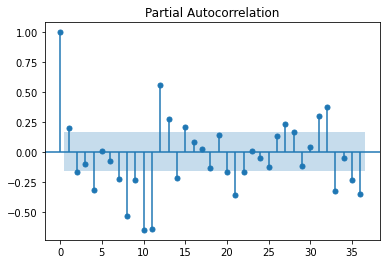

In [52]:
acf = plot_acf(ts_log_diff, lags=36)
pacf = plot_pacf(ts_log_diff, lags=36)

### Contrucción del Modelo AR

In [50]:
from statsmodels.tsa.ar_model import AutoReg

In [51]:
model = ARIMA(ts_log, order=(2,1,0))
# results_AR = model.fit(disp=-1)
# plt.plot(ts_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('Modelo AR(1)')

C:\Users\jmart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jmart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jmart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
